In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tweets_data_path = 'stanlee.json'
# tweets_data_path = 'stanlee.json'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
tweets= pd.DataFrame()
#  json Python library to parse the data, and read the data into an array. 
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))

print(len(tweets))


13028


In [2]:
import re
def word_in_text(word,tweet):
    count=0
    for tweet in tweets_data:
        #tweet['text'].lower()
        match = re.search(word, tweet['text'])
        if match:
            count = count+1   
            #print(tweet['text'])
    return count

In [3]:
stanlee = word_in_text('stanlee', tweet)
hashtagstanlee = word_in_text('#StanLee', tweet)
Stan_Lee = word_in_text('Stan Lee', tweet)
STANLEE = word_in_text('STANLEE', tweet)
STAN_LEE = word_in_text('STAN LEE', tweet)
hashtagSTANLEE = word_in_text('#STANLEE', tweet)


In [4]:
df_text_lang = pd.DataFrame({'text': tweets['text'], 'lang': tweets['lang'], 'sentiment': None})
only_en_tweet = df_text_lang[df_text_lang['lang'].str.contains("en")]
only_en_tweet = only_en_tweet.drop('lang',axis=1)
only_en_tweet


,sentiment,text
2,None,Enough said - Stan the man Lee https://t.co/zH...
3,None,"""RIP in Peace Stan Lee"" from @MiddleUrinalPod ..."
4,None,RT @SoWizardPodcast: Check out episode 224 of ...
5,None,RT @comicsandpanels: Stan Lee and Steve Ditko ...
7,None,RT @STAY_mutuals: Gain STAY Mutuals!💕🌻\n※ rt a...
8,None,#StanLeeForever #Remix #EDM #StanLee #marvelco...
9,None,Stan Lee Inspired Us All: Celebrate His 95 Yea...
12,None,Now for something breathtaking: A new episode ...
13,None,RT @BSpodNetwork: Now for something breathtaki...
14,None,Rap De Stan Lee EN ESPAÑOL || Frikirap || CriC...


In [5]:
from textblob import TextBlob 

In [6]:
def clean_tweet(tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", tweet).split())

In [7]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

In [8]:
sentiments = []
for text in only_en_tweet['text']:
    sentiments.append(get_tweet_sentiment(text))

numPositiveTweets = sentiments.count('positive')
numNegativeTweets = sentiments.count('negative')
numNeutralTweets = sentiments.count('neutral')

In [17]:
print(numPositiveTweets)
print(numNegativeTweets)
print(numNeutralTweets)

3896
726
6482


In [9]:
only_en_tweet['sentiment'] = sentiments

only_en_tweet.head(5)

,sentiment,text
2,neutral,Enough said - Stan the man Lee https://t.co/zH...
3,positive,"""RIP in Peace Stan Lee"" from @MiddleUrinalPod ..."
4,positive,RT @SoWizardPodcast: Check out episode 224 of ...
5,neutral,RT @comicsandpanels: Stan Lee and Steve Ditko ...
7,neutral,RT @STAY_mutuals: Gain STAY Mutuals!💕🌻\n※ rt a...


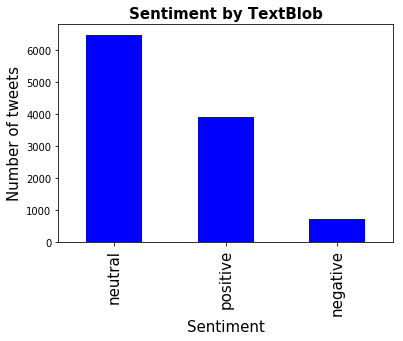

In [12]:
tweets_by_sentiment = only_en_tweet['sentiment'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Sentiment by TextBlob', fontsize=15, fontweight='bold')
tweets_by_sentiment[:5].plot(ax=ax, kind='bar', color='blue')

# picking positive tweets from tweets 
    ptweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets))) 
    # picking negative tweets from tweets 
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets))) 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % \ 
        ".format(100*len(tweets - ntweets - ptweets)/len(tweets))) 
  
    # printing first 5 positive tweets 
    print("\n\nPositive tweets:") 
    for tweet in ptweets[:10]: 
        print(tweet['text']) 
  
    # printing first 5 negative tweets 
    print("\n\nNegative tweets:") 
    for tweet in ntweets[:10]: 
        print(tweet['text'])

In [18]:
only_en_tweet['sentiment'].head()

2     neutral
3    positive
4    positive
5     neutral
7     neutral
Name: sentiment, dtype: object

In [25]:
Sentiment=pd.get_dummies(only_en_tweet['sentiment'],drop_first= True)

In [26]:
Sentiment.head()

,neutral,positive
2,1,0
3,0,1
4,0,1
5,1,0
7,1,0


In [28]:
final_study=pd.concat([only_en_tweet.drop(['sentiment'],axis=1),Sentiment['positive']],axis=1)
final_study.head()

,text,positive
2,Enough said - Stan the man Lee https://t.co/zH...,0
3,"""RIP in Peace Stan Lee"" from @MiddleUrinalPod ...",1
4,RT @SoWizardPodcast: Check out episode 224 of ...,1
5,RT @comicsandpanels: Stan Lee and Steve Ditko ...,0
7,RT @STAY_mutuals: Gain STAY Mutuals!💕🌻\n※ rt a...,0


In [30]:
def clean_text(text_train):# applies pre- processing on the given text 
 
    text_train = text_train.lower()# converts everything to lower case and splits
    text_train=re.sub(r'[\d,@\'?\.$%_()&*#!;:]',"", text_train) # replaces punctuation and numbers but keeps spaces, needed for tokens 
    text_train=re.sub("[^a-zA-Z]", " ", text_train) # keep only words
    text_train=word_tokenize(text_train) # tokenizes - breaks sentenses into words
    stopWords = set(stopwords.words('english')) # removes words that lack meaning  
    for word in text_train: # removes stopwords
        if word in stopWords:
            text_train.remove(word)
    return text_train

In [33]:
cleaned_tweets = clean_text(final_study['text'].to_string())
print(cleaned_tweets[:50])

['enough', 'said', 'stan', 'man', 'lee', 'https', 'tco', 'zh', 'rip', 'peace', 'stan', 'lee', 'middleurinalpod', 'rt', 'sowizardpodcast', 'check', 'episode', 'rt', 'comicsandpanels', 'stan', 'lee', 'steve', 'ditko', 'rt', 'staymutuals', 'gain', 'stay', 'mutuals', 'n', 'rt', 'stanleeforever', 'remix', 'edm', 'stanlee', 'marvelco', 'stan', 'lee', 'inspired', 'us', 'celebrate', 'yea', 'something', 'breathtaking', 'new', 'episode', 'rt', 'bspodnetwork', 'something', 'breathtaki', 'rap']


In [34]:
freq = pd.Series(' '.join(cleaned_tweets).split()).value_counts()[:10]
freq

rt             9441
stan           6113
lee            5864
marvel         3932
creator        3833
dies           3793
eentric        3706
the            1443
n               996
jewishvoice     865
dtype: int64

In [36]:
#cleaned_tweets_df=pd.DataFrame(cleaned_tweets)

In [39]:
#freq = list(freq.index)
#cleaned_tweets_df=cleaned_tweets_df.apply(lambda x: " ".join(x for x in x.split() if x not in freq))
#cleaned_tweets_df.head()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
bagofwords=vect.fit_transform(cleaned_tweets).toarray()
bagofwords.shape

(70528, 4704)

In [44]:
bagofwords

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [63]:
X=pd.DataFrame(bagofwords,columns=vect.get_feature_names())
X=X.iloc[:11104]
X.shape

(11104, 4704)

In [64]:
Y=pd.DataFrame(final_study['positive'])
Y.head()

,positive
2,0
3,1
4,1
5,0
7,0


In [65]:
Y.shape

(11104, 1)

In [69]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)  

In [72]:
from sklearn import metrics
#the two naive bayes algorithms
from sklearn.naive_bayes import GaussianNB 
from sklearn.naive_bayes import MultinomialNB

In [74]:
algorithm_a=MultinomialNB()

In [75]:
algorithm_a.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [76]:
output=algorithm_a.predict(X_test)

In [77]:
metrics.accuracy_score(Y_test,output)

0.6357496623142729

In [78]:
metrics.confusion_matrix(Y_test,output)

array([[1378,   53],
       [ 756,   34]])

In [79]:
algorithm_b=GaussianNB()

In [80]:
algorithm_b.fit(X_train,Y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

In [81]:
output1=algorithm_b.predict(X_test)

In [82]:
metrics.accuracy_score(Y_test,output1)

0.36830256641152637

In [83]:
metrics.confusion_matrix(Y_test,output1)

array([[  81, 1350],
       [  53,  737]])